In [69]:
import pandas as pd
import numpy as np

import os

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
for dirname, _, filenames in os.walk('/Kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/Kaggle/input\.RData
/Kaggle/input\.Rhistory
/Kaggle/input\all_energy_statistics.csv
/Kaggle/input\apple-aapl-historical-stock-data.zip
/Kaggle/input\international-energy-statistics.zip
/Kaggle/input\iris.data
/Kaggle/input\shot_logs.csv
/Kaggle/input\top50.csv
/Kaggle/input\vgsales.csv


# Section 1: Define the Problem

__Given this data on international energy statistics, what sort of common good problem can be derived:__

    The focus of this project should probably lie in comparing certain categories of energy sources. 
    I will first read through all categories and then plot a histogram to see which energy sources have been 
    around the longest.
    

In [6]:
df = pd.read_csv('/Kaggle/input/all_energy_statistics.csv')

In [9]:
df.head(10)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
5,Belgium,Additives and Oxygenates - Exports,2011,"Metric tons, thousand",25.0,NaN,additives_and_oxygenates
6,Belgium,Additives and Oxygenates - Exports,2010,"Metric tons, thousand",22.0,NaN,additives_and_oxygenates
7,Belgium,Additives and Oxygenates - Exports,2009,"Metric tons, thousand",45.0,NaN,additives_and_oxygenates
8,Czechia,Additives and Oxygenates - Exports,1998,"Metric tons, thousand",1.0,NaN,additives_and_oxygenates
9,Czechia,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",7.0,NaN,additives_and_oxygenates


In [10]:
df.dtypes

country_or_area           object
commodity_transaction     object
year                       int64
unit                      object
quantity                 float64
quantity_footnotes       float64
category                  object
dtype: object

In [13]:
df.category.unique()

array(['additives_and_oxygenates', 'animal_waste', 'anthracite',
       'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas',
       'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar',
       'coke_oven_coke', 'coking_coal', 'conventional_crude_oil',
       'direct_use_of_geothermal_heat',
       'direct_use_of_solar_thermal_heat',
       'electricity_net_installed_capacity_of_electric_power_plants',
       'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke',
       'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas',
       'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste',
       'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas',
       'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha',
       'natural_gas_including_lng', 'natural_gas_liquids',
       'nuclear_electricity', 'of_which_biodiesel',
       'of_which_biogasoline', 'oil_shale_oil_sa

# Categories of Energy:
## Renewables
1. solar_electricity
2. wind_electricity
3. hydro
4. tide_wave_and_ocean_electricity
5. geothermal
6. falling_water

## Non-Renewables
1. natural_gas_including_lng
2. coal_tar
3. hard_coal
4. petroleum_coke
5. nuclear_electricity
6. conventional_crude_oil

In [29]:
df_by_year = df.sort_values(by=['year'],ascending = False)

In [30]:
df_by_year.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
821902,Myanmar,Natural gas (including LNG) - Memo:Gross produ...,2014,Terajoules,594851.00000,NaN,natural_gas_including_lng
272490,Sweden,Fuel oil - Consumption by other,2014,"Metric tons, thousand",12.00000,NaN,fuel_oil
414628,Ghana,Gas Oil/ Diesel Oil - Consumption in agricultu...,2014,"Metric tons, thousand",44.50000,NaN,gas_oil_diesel_oil
340286,"Korea, Republic of","Fuelwood - Consumption by manufacturing, const...",2014,"Cubic metres, thousand",3150.41051,1.0,fuelwood
1175433,Ghana,Total refinery throughput,2014,"Metric tons, thousand",70.10000,NaN,total_refinery_output


In [128]:
renewable_sources = ['solar_electricity','wind_electricity','hydro',
                                     'tide_wave_and_ocean_electricity','geothermal',
                                    'falling_water']
non_rw_sources = ['natural_gas_including_lng','coal_tar','hard_coal',
                                        'petroleum_coke','nuclear_electricity', 'conventional_crude_oil']

renewables = df[df['category'].isin(['solar_electricity','wind_electricity','hydro'])]
sustainables = df[df['category'].isin(['natural_gas_including_lng','hard_coal',
                                        'conventional_crude_oil'])]

In [63]:
renewables.sort_values(by=['category'],inplace = True)

sustainables.sort_values(by=['category'],inplace = True)

<ipython-input-63-274cfc92118a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renewables.sort_values(by=['category'],inplace = True)
<ipython-input-63-274cfc92118a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sustainables.sort_values(by=['category'],inplace = True)


In [74]:
renewables['category'].value_counts()

hydro                              3744
wind_electricity                   1367
falling_water                       962
solar_electricity                   953
geothermal                          496
tide_wave_and_ocean_electricity      58
Name: category, dtype: int64

# Section 2: Exploratory Data Analysis
## Explore the dataset and find patterns as well as visualizations

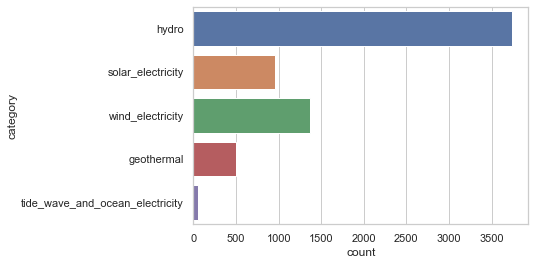

In [106]:
sns.set_theme(style='whitegrid')

renew_plot = sns.countplot(y='category', data=renewables)

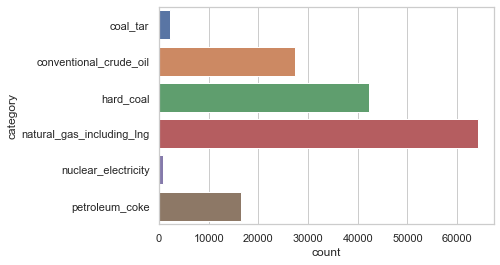

In [81]:
sustain_plot = sns.countplot(y='category', data=sustainables)

In [88]:
renewables = df[df['category'].isin(['hydro','wind_electricity','solar_electricity'])]

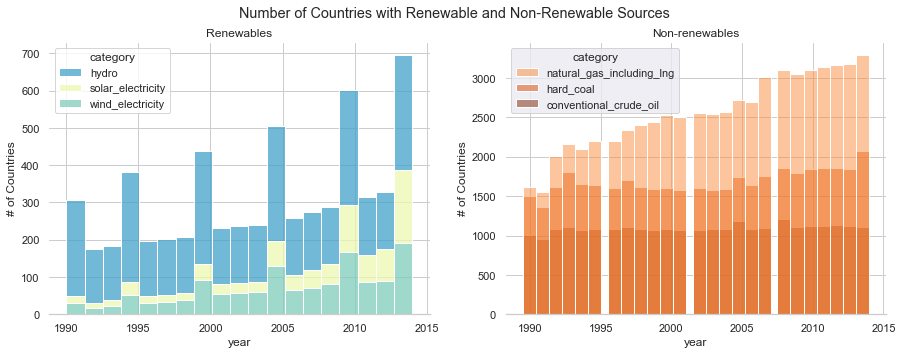

In [157]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Number of Countries with Renewable and Non-Renewable Sources')

with sns.axes_style('ticks'):
    sns.despine(left=True)
    sns.set_palette(['#43a2ca','#edf8b1','#7fcdbb'])
    renew_by_year = sns.histplot(ax = axes[0],x='year', hue='category', data=renewables,multiple='stack') 
    axes[0].set_ylabel('# of Countries')
    axes[0].set_title('Renewables')
    
with sns.axes_style('dark'):
    sns.despine(left=True)
    sns.set_palette(['#fd8d3c','#d94801','#7f2704'])
    renew_by_year = sns.histplot(ax = axes[1],x='year', hue='category', data=sustainables, multiple = 'layer', shrink = 2) 
    axes[1].set_ylabel('# of Countries')
    axes[1].set_title('Non-renewables')

__Notice that the Non-Renewables still outmatch the renewables. So I will now look into what countries are leading the world in renewable energy, and how that compares to their usage of non-renewable sources. Also notice that none of the non-renewable sources are sustainable__